# Health analytics

### Roger Montané Güell (1569031)

Kaggle dataset: https://www.kaggle.com/nehaprabhavalkar/av-healthcare-analytics-ii

In [24]:
import numpy as np
from sklearn import preprocessing
import collections
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
import warnings
warnings.filterwarnings("ignore")

Let's load the data:

In [3]:
# Function to read csv files and save them as a pandas structure
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

In [4]:
train = load_dataset('Healthcare_data/train_data.csv')
train.shape

(318438, 18)

In [5]:
test = load_dataset('Healthcare_data/test_data.csv')
test.shape

(137057, 17)

---
### Exploratory data analysis

In [80]:
train_data = train.copy(deep=True)
print("Train data info:\n")
print(train_data.info())
print(train_data.isna().sum())
train_data.head()

Train data info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
case_id                              318438 non-null int64
Hospital_code                        318438 non-null int64
Hospital_type_code                   318438 non-null object
City_Code_Hospital                   318438 non-null int64
Hospital_region_code                 318438 non-null object
Available Extra Rooms in Hospital    318438 non-null int64
Department                           318438 non-null object
Ward_Type                            318438 non-null object
Ward_Facility_Code                   318438 non-null object
Bed Grade                            318325 non-null float64
patientid                            318438 non-null int64
City_Code_Patient                    313906 non-null float64
Type of Admission                    318438 non-null object
Severity of Illness                  318438 non-null object
Visitors with Patient             

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [82]:
test_data = test.copy(deep=True)
print("Test data info:\n")
print(test_data.info())
print(test_data.isna().sum())
test_data.head()

Test data info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
case_id                              137057 non-null int64
Hospital_code                        137057 non-null int64
Hospital_type_code                   137057 non-null object
City_Code_Hospital                   137057 non-null int64
Hospital_region_code                 137057 non-null object
Available Extra Rooms in Hospital    137057 non-null int64
Department                           137057 non-null object
Ward_Type                            137057 non-null object
Ward_Facility_Code                   137057 non-null object
Bed Grade                            137022 non-null float64
patientid                            137057 non-null int64
City_Code_Patient                    134900 non-null float64
Type of Admission                    137057 non-null object
Severity of Illness                  137057 non-null object
Visitors with Patient              

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


Only 'Bed Grade' and 'City_Code_Patient' have NULL values. Both seem pretty unimportant (especiacially 'City_Code_Patient' since we assume that where a patient lives does not affect the amount of days it stays in the hospital).

There are 2 approaches to getting rid of the NULL values:
1. Eliminate each row that has a NULL value
2. Replace NULL value by a newly generated value using the distribution of the attribute

Approach 1:

In [85]:
train_data = train_data.dropna()
train_data.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

Approach 2:

In [83]:
#TODO

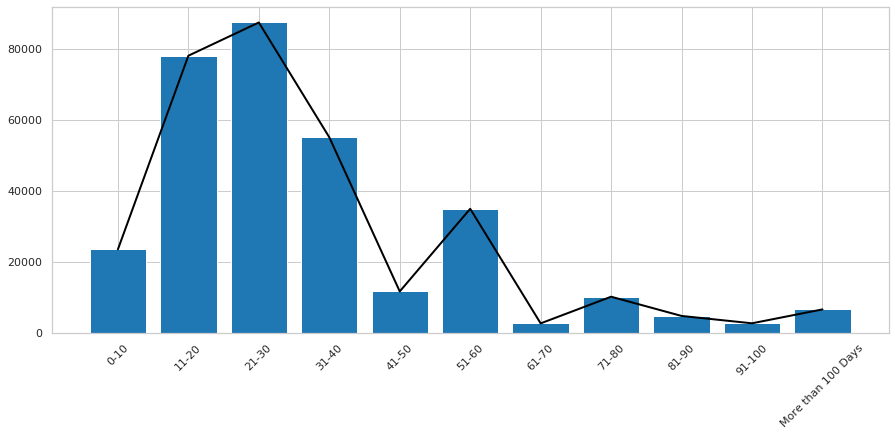

In [86]:
from collections import Counter
d = dict(sorted(Counter(train['Stay'].tolist()).items()))
x,y = zip(*sorted(d.items()))
plt.figure(figsize=(15, 6))
plt.xticks(rotation=45)
plt.bar(x,y)
plt.plot(x,y, color="black")
plt.show()


In [88]:
train_data['Stay']

0          0-10
1         41-50
2         31-40
3         41-50
4         41-50
          ...  
318433    11-20
318434    31-40
318435    11-20
318436    11-20
318437     0-10
Name: Stay, Length: 313793, dtype: object

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

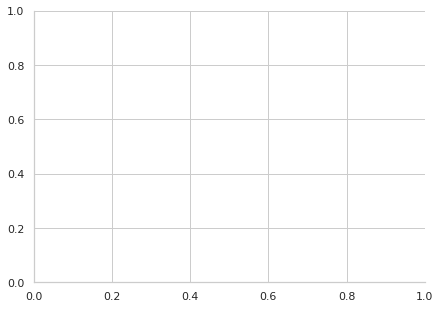

In [87]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.kdeplot(train_data['Stay'], shade=True)

---

**Our dataset (from [Kaggle](https://www.kaggle.com/nehaprabhavalkar/av-healthcare-analytics-ii)):**

"Problem Statement

Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.

This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.

Suppose you have been hired as Data Scientist of HealthMan – a not for profit organization dedicated to manage the functioning of Hospitals in a professional and optimal manner.

The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days."

Let's now have a look at our attributes and what information they give us:

In [41]:
train_data_dictionary = load_dataset('Healthcare_data/train_data_dictionary.csv')
train_data_dictionary

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


Let's now see how our data looks:

In [42]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


We have several non-numeric attributes, we will have to modify them.

In [44]:
train_numeric = train.copy(deep=True)
test_numeric = test.copy(deep=True)

train_prova = train.copy(deep=True)

**Hospital_type_code**: a = 1, b = 2, c = 3, d = 4, e = 5, f = 6, g = 7

In [16]:
train_numeric["Hospital_type_code"].replace({"a": 1, "b": 2, "c": 3, "d": 4, "e": 5, "f": 6, "g": 7}, inplace=True)
test_numeric["Hospital_type_code"].replace({"a": 1, "b": 2, "c": 3, "d": 4, "e": 5, "f": 6, "g": 7}, inplace=True)

**Hospital_region_code**: X = 1, Y = 2, Z = 3

In [17]:
train_numeric["Hospital_region_code"].replace({"X": 1, "Y": 2, "Z": 3}, inplace=True)
test_numeric["Hospital_region_code"].replace({"X": 1, "Y": 2, "Z": 3}, inplace=True)

**Department**:

In [18]:
departments = train["Department"].unique()
departments

array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
       'surgery'], dtype=object)

In [19]:
train_numeric["Department"].replace({'radiotherapy': 1, 'anesthesia': 2, 'gynecology': 3,
                                    'TB & Chest disease': 4, 'surgery': 5}, inplace=True)
test_numeric["Department"].replace({'radiotherapy': 1, 'anesthesia': 2, 'gynecology': 3,
                                    'TB & Chest disease': 4, 'surgery': 5}, inplace=True)

**Ward_Type**:

In [20]:
ward_types = train["Ward_Type"].unique()
ward_types

array(['R', 'S', 'Q', 'P', 'T', 'U'], dtype=object)

In [21]:
train_numeric["Ward_Type"].replace({'P': 1, 'Q': 2, 'R': 3, 'S': 4, 'T': 5, 'U': 6}, inplace=True)
test_numeric["Ward_Type"].replace({'P': 1, 'Q': 2, 'R': 3, 'S': 4, 'T': 5, 'U': 6}, inplace=True)

**Ward_Facility_Code**:

In [22]:
facility_codes = train["Ward_Facility_Code"].unique()
facility_codes

array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object)

In [23]:
train_numeric["Ward_Facility_Code"].replace({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6}, inplace=True)
test_numeric["Ward_Facility_Code"].replace({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6}, inplace=True)

**Type of Admission**:

In [24]:
admission_type = train["Type of Admission"].unique()
admission_type

array(['Emergency', 'Trauma', 'Urgent'], dtype=object)

In [25]:
train_numeric["Type of Admission"].replace({'Emergency': 1, 'Trauma': 2, 'Urgent': 3}, inplace=True)
test_numeric["Type of Admission"].replace({'Emergency': 1, 'Trauma': 2, 'Urgent': 3}, inplace=True)

**Severity of Illness**:

In [26]:
illness_severity = train["Severity of Illness"].unique()
illness_severity

array(['Extreme', 'Moderate', 'Minor'], dtype=object)

In [27]:
train_numeric["Severity of Illness"].replace({'Extreme': 1, 'Moderate': 2, 'Minor': 3}, inplace=True)
test_numeric["Severity of Illness"].replace({'Extreme': 1, 'Moderate': 2, 'Minor': 3}, inplace=True)

In [68]:
d = defaultdict(preprocessing.LabelEncoder())
fit = train_prova.apply(lambda x: d[x.name].fit_transform(x))

TypeError: first argument must be callable or None

In [65]:
le = preprocessing.LabelEncoder()
le.fit_transform(train_prova["Severity of Illness"].unique())
train_prova
#train_prova["Severity of Illness"].unique()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


**Age**:

In [28]:
age = train["Age"].unique()
age

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [29]:
train_numeric["Age"].replace({'0-10': 1, '11-20': 2, '21-30': 3, '31-40': 4, '41-50': 5,
                            '51-60': 6, '61-70': 7, '71-80': 8, '81-90': 9, '91-100': 10}, inplace=True)
test_numeric["Age"].replace({'0-10': 1, '11-20': 2, '21-30': 3, '31-40': 4, '41-50': 5,
                            '51-60': 6, '61-70': 7, '71-80': 8, '81-90': 9, '91-100': 10}, inplace=True)

---

In [30]:
train_numeric.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,3,3,3,3,1,3,6,2.0,31397,7.0,1,1,2,6,4911.0,0-10
1,2,2,3,5,3,2,1,4,6,2.0,31397,7.0,2,1,2,6,5954.0,41-50
2,3,10,5,1,1,2,2,4,5,2.0,31397,7.0,2,1,2,6,4745.0,31-40
3,4,26,2,2,2,2,1,3,4,2.0,31397,7.0,2,1,2,6,7272.0,41-50
4,5,26,2,2,2,2,1,4,4,2.0,31397,7.0,2,1,2,6,5558.0,41-50


In [31]:
test_numeric.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,3,3,3,3,3,4,1,2.0,17006,2.0,1,2,2,8,3095.0
1,318440,29,1,4,1,2,3,4,6,2.0,17006,2.0,2,2,4,8,4018.0
2,318441,26,2,2,2,3,3,2,4,4.0,17006,2.0,1,2,3,8,4492.0
3,318442,6,1,6,1,3,3,2,6,2.0,17006,2.0,2,2,3,8,4173.0
4,318443,28,2,11,1,2,3,3,6,2.0,17006,2.0,2,2,4,8,4161.0


In [32]:
train_numeric.describe()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,2.256841,4.771717,1.778098,3.197627,2.765439,2.888575,4.286913,2.625807,65747.579472,7.251859,1.782768,2.091537,3.284099,5.127777,4880.749392
std,91925.276848,8.633755,1.535712,3.102535,0.752527,1.168171,0.664438,0.804655,1.688050,0.873146,37979.936440,4.745266,0.688957,0.662886,1.764061,1.889567,1086.776254
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1800.000000
25%,79610.250000,11.000000,1.000000,2.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,32847.000000,4.000000,1.000000,2.000000,2.000000,4.000000,4186.000000
50%,159219.500000,19.000000,2.000000,5.000000,2.000000,3.000000,3.000000,3.000000,5.000000,3.000000,65724.500000,8.000000,2.000000,2.000000,3.000000,5.000000,4741.000000
75%,238828.750000,26.000000,3.000000,7.000000,2.000000,4.000000,3.000000,3.000000,6.000000,3.000000,98470.000000,8.000000,2.000000,3.000000,4.000000,6.000000,5409.000000
max,318438.000000,32.000000,7.000000,13.000000,3.000000,24.000000,5.000000,6.000000,6.000000,4.000000,131624.000000,38.000000,3.000000,3.000000,32.000000,10.000000,11008.000000


In [33]:
test_numeric.describe()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
count,137057.000000,137057.000000,137057.000000,137057.000000,137057.000000,137057.000000,137057.000000,137057.000000,137057.000000,137022.000000,137057.000000,134900.000000,137057.000000,137057.000000,137057.000000,137057.000000,137057.000000
mean,386967.000000,18.343747,2.255711,4.758692,1.779304,3.192686,2.761778,2.886952,4.287056,2.634489,65877.903515,7.243996,1.783098,2.090408,3.284531,5.124386,4869.731097
std,39565.092259,8.634694,1.525928,3.102245,0.754889,1.164250,0.667248,0.804768,1.693618,0.869295,37942.997623,4.790625,0.689712,0.662830,1.777270,1.890007,1080.766723
min,318439.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1800.000000
25%,352703.000000,11.000000,1.000000,2.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,32945.000000,4.000000,1.000000,2.000000,2.000000,4.000000,4178.000000
50%,386967.000000,19.000000,2.000000,5.000000,2.000000,3.000000,3.000000,3.000000,5.000000,3.000000,65786.000000,8.000000,2.000000,2.000000,3.000000,5.000000,4731.000000
75%,421231.000000,26.000000,3.000000,7.000000,2.000000,4.000000,3.000000,3.000000,6.000000,3.000000,98851.000000,8.000000,2.000000,3.000000,4.000000,6.000000,5398.000000
max,455495.000000,32.000000,7.000000,13.000000,3.000000,21.000000,5.000000,6.000000,6.000000,4.000000,131618.000000,38.000000,3.000000,3.000000,32.000000,10.000000,11920.000000


Now that al attributes are numeric, let's see if we have any NULL values:

In [34]:
print('Valors no existents train_data.csv:')
print(train.isnull().sum(),'\n')
print('Valors no existents test_data.csv:')
print(test.isnull().sum())

Valors no existents train_data.csv:
case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64 

Valors no existents test_data.csv:
case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital              

It seems that we have several NULL values in both train and test datasets, but only for the "Bed Grade" and "City_Code_Patient" attributes. If these are not important for our study then these NULL values will not be problematic. If they are important however, we will have to deal with them by deleting each row that has a NULL value in it:

In [36]:
train_numeric = train_numeric.dropna()
test_numeric = test_numeric.dropna()
print('Valors no existents train_numeric:')
print(train_numeric.isnull().sum(),'\n')
print('Valors no existents test_numeric:')
print(test_numeric.isnull().sum(),'\n')

Valors no existents train_numeric:
case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64 

Valors no existents test_numeric:
case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Roo